# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "../data/Mouse_metadata.csv"
study_results_path = "../data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
study_data_complete.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_count = study_data_complete["Mouse ID"].nunique()
mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#study_data_complete.duplicated()
study_data_complete[study_data_complete.duplicated(["Mouse ID", "Timepoint"], keep=False)]

#not sure where the array is coming from in starter code

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = study_data_complete[(study_data_complete["Mouse ID"] == "g989")]
duplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_data_clean = study_data_complete.drop(duplicate_mouse.index)
study_data_clean

#.drop(duplicate_mouse)
#https://stackoverflow.com/questions/43136137/drop-a-specific-row-in-pandas
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_count = study_data_clean["Mouse ID"].nunique()
mouse_count


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

drug_regimen_mean = study_data_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
drug_regimen_median = study_data_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
drug_regimen_variance = study_data_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
drug_regimen_std = study_data_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
drug_regimen_sem = study_data_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_regimen_stats = pd.DataFrame({"Mean Tumor Volume": drug_regimen_mean,
                                   "Median Tumor Volume": drug_regimen_median, 
                                   "Tumor Volume Variance": drug_regimen_variance, 
                                   "Tumor Volume Std. Dev.": drug_regimen_std, 
                                   "Tumor Volume Std. Err.": drug_regimen_sem})

drug_regimen_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_regimen_agg = study_data_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(("mean", "median", "var", "std", "sem"))
drug_regimen_agg                                                                                        

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

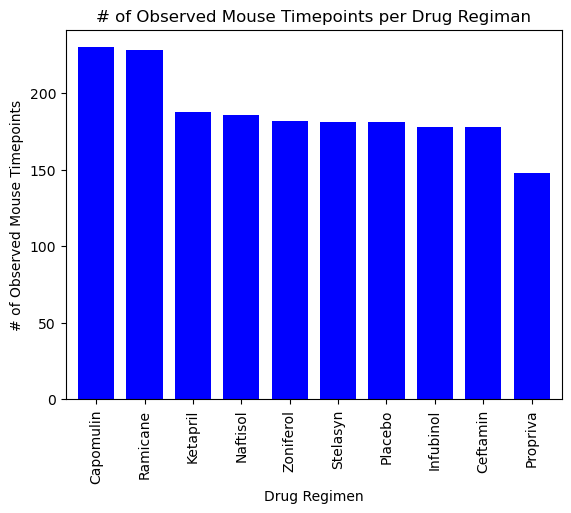

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
number_of_observations = study_data_clean["Drug Regimen"].value_counts()

observations_chart_pandas = number_of_observations.plot(kind="bar", facecolor="blue", width=.75,
                                                  title="# of Observed Mouse Timepoints per Drug Regiman",
                                                  xlabel="Drug Regimen",
                                                  ylabel="# of Observed Mouse Timepoints")



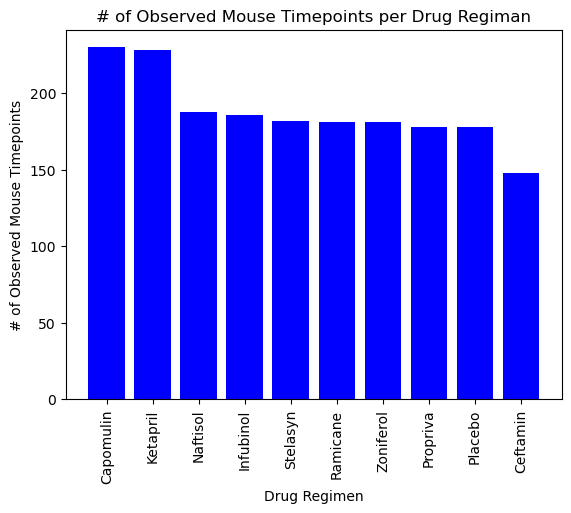

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
number_of_observations = study_data_clean["Drug Regimen"].value_counts()
drugs = study_data_clean["Drug Regimen"].unique()

x_axis = drugs
y_axis = number_of_observations
plt.bar(x_axis, y_axis, color='b', alpha=1)
plt.xticks(rotation=90)
plt.title("# of Observed Mouse Timepoints per Drug Regiman")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xlabel("Drug Regimen")


plt.show()

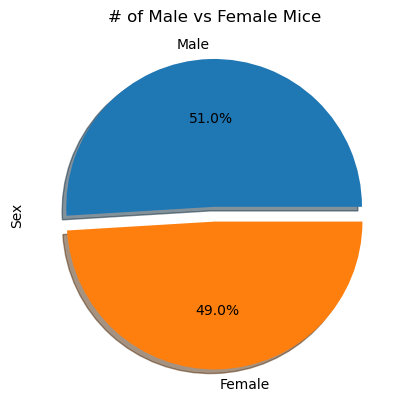

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_v_female = study_data_clean["Sex"].value_counts()
sex_chart_pandas = male_v_female.plot(kind="pie", autopct='%1.1f%%', shadow=True, explode=[0.05, 0.05],
                                      title="# of Male vs Female Mice", ylabel="Sex")

Text(0, 0.5, 'Sex')

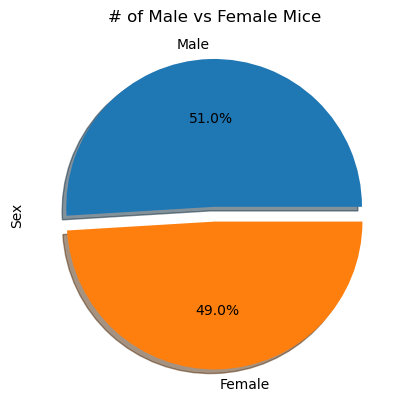

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male_v_female = study_data_clean["Sex"].value_counts()
plt.pie(male_v_female, labels=male_v_female.index, autopct='%.1f%%', shadow=True, explode=[0.05, 0.05])
plt.title("# of Male vs Female Mice")
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [13]:
#Xpert Learning Assistant for help on part of this
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

#list of treatments
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

#DataFrame with only drugs in the list
reduced_df = study_data_clean[study_data_clean["Drug Regimen"].isin(drugs)]

max_timepoint_tumor_volumes = []
max_timepoint_list = []
mouse_id_list = []
max_drug_list = []

# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = reduced_df.groupby('Mouse ID')['Timepoint'].max()

##comment


for mouse_id, max_timepoint in max_timepoints.items():
    tumor_volume = reduced_df[(reduced_df['Mouse ID'] == mouse_id) & (reduced_df['Timepoint'] == max_timepoint)]['Tumor Volume (mm3)'].values[0]
    drug_name = reduced_df[(reduced_df['Mouse ID'] == mouse_id) & (reduced_df['Timepoint'] == max_timepoint)]['Drug Regimen'].values[0]
    max_timepoint_tumor_volumes.append(tumor_volume)
    max_timepoint_list.append(max_timepoint)
    mouse_id_list.append(mouse_id)
    max_drug_list.append(drug_name)
   
            
max_timepoint_tumor_volumes

max_timepoints_df = pd.DataFrame({"Mouse ID": mouse_id_list, 
                                  "Max Timepoint": max_timepoint_list, 
                                  "Tumor Volume at Max Timepoint": max_timepoint_tumor_volumes, 
                                  "Drug Regimen": max_drug_list})
max_timepoints_df

,Mouse ID,Max Timepoint,Tumor Volume at Max Timepoint,Drug Regimen
0,a203,45,67.973419,Infubinol
1,a251,45,65.525743,Infubinol
2,a275,45,62.999356,Ceftamin
3,a411,45,38.407618,Ramicane
4,a444,45,43.047543,Ramicane
...,...,...,...,...
95,y769,45,68.594745,Ceftamin
96,y793,45,31.896238,Capomulin
97,y865,45,64.729837,Ceftamin
98,z578,45,30.638696,Ramicane


In [15]:
Capomulin_mtvs = max_timepoints_df[(max_timepoints_df["Drug Regimen"] == "Capomulin")]["Tumor Volume at Max Timepoint"]
Ramicane_mtvs = max_timepoints_df[(max_timepoints_df["Drug Regimen"] == "Ramicane")]["Tumor Volume at Max Timepoint"]
Infubinol_mtvs = max_timepoints_df[(max_timepoints_df["Drug Regimen"] == "Infubinol")]["Tumor Volume at Max Timepoint"]
Ceftamin_mtvs = max_timepoints_df[(max_timepoints_df["Drug Regimen"] == "Ceftamin")]["Tumor Volume at Max Timepoint"]
Max_tumor_drug_list = [Capomulin_mtvs, Ramicane_mtvs, Infubinol_mtvs, Ceftamin_mtvs]

outliers = []

# Determine outliers using upper and lower bounds
for treatment in Max_tumor_drug_list:
    quartiles = treatment.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    for mouse in treatment.items():
        if mouse[1] < lower_bound: 
            outliers.append(mouse)
        elif mouse[1] > upper_bound:
            outliers.append(mouse)
    

print(outliers)
outlier = max_timepoints_df.iloc[15,:]
outlier


[(15, 36.3213458)]


Mouse ID                              c326
Max Timepoint                            5
Tumor Volume at Max Timepoint    36.321346
Drug Regimen                     Infubinol
Name: 15, dtype: object

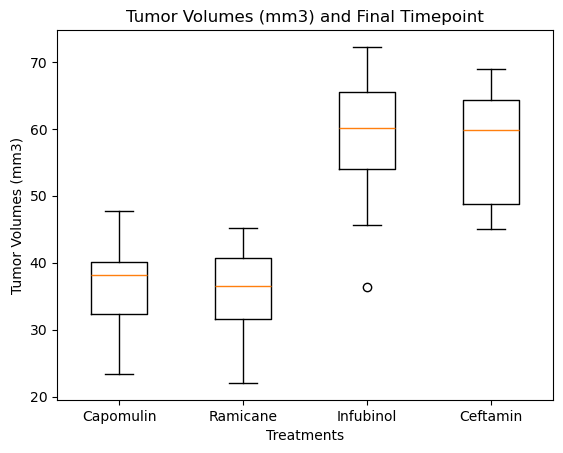

In [16]:
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
Capomulin_max_tv = []
Ramicane_max_tv = []
Infubinol_max_tv = []
Ceftamin_max_tv = []

for mouse_id, max_timepoint in max_timepoints.items():
    tumor_volume = reduced_df[(reduced_df['Mouse ID'] == mouse_id) & (reduced_df['Timepoint'] == max_timepoint)]['Tumor Volume (mm3)'].values[0]
    drug_name = reduced_df[(reduced_df['Mouse ID'] == mouse_id) & (reduced_df['Timepoint'] == max_timepoint)]['Drug Regimen'].values[0]
    
    if drug_name == "Capomulin":
        Capomulin_max_tv.append(tumor_volume)
    elif drug_name == "Ramicane":
        Ramicane_max_tv.append(tumor_volume)
    elif drug_name == "Infubinol":
        Infubinol_max_tv.append(tumor_volume)
    elif drug_name == "Ceftamin":
        Ceftamin_max_tv.append(tumor_volume)# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Create a list of data arrays
data = [Capomulin_max_tv, Ramicane_max_tv, Infubinol_max_tv, Ceftamin_max_tv]

# Create a boxplot for the data
plt.boxplot(data)

# Add labels to the x-axis
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

# Add a title and labels
plt.title('Tumor Volumes (mm3) and Final Timepoint')
plt.xlabel('Treatments')
plt.ylabel('Tumor Volumes (mm3)')

# Show the plot
plt.show()

#Xpert learning assistant
#https://stackoverflow.com/questions/52273543/creating-multiple-boxplots-on-the-same-graph-from-a-dictionary

## Line and Scatter Plots

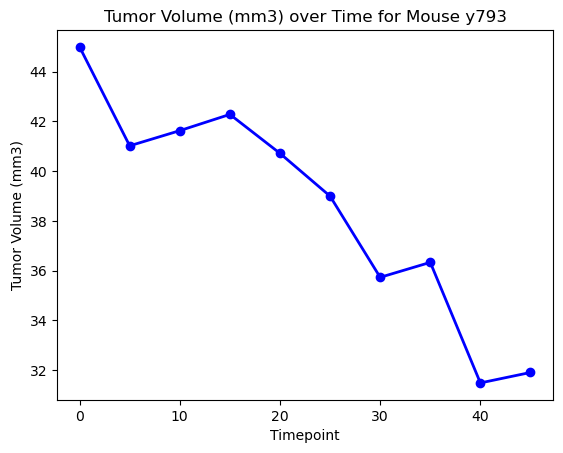

In [24]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_y793 = study_data_clean[(study_data_clean["Mouse ID"] == "y793")]
tumor_vol_y793 = mouse_y793["Tumor Volume (mm3)"]
timepoint_y793 = mouse_y793["Timepoint"]
timepoint_y793

plt.title("Tumor Volume (mm3) over Time for Mouse y793")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.plot(timepoint_y793, tumor_vol_y793, color="blue", marker="o", linewidth=2)
plt.show()

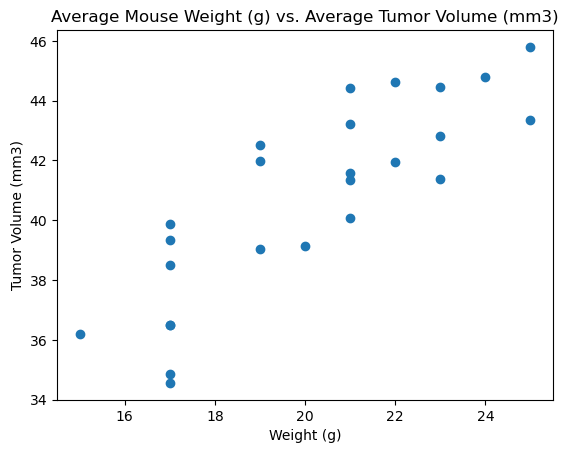

In [25]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_data = study_data_clean[(study_data_clean["Drug Regimen"] == "Capomulin")]

avg_weight_per_mouse = Capomulin_data.set_index(["Mouse ID"])["Weight (g)"].groupby(["Mouse ID"]).mean()
avg_tv_per_mouse = Capomulin_data.set_index(["Mouse ID"])["Tumor Volume (mm3)"].groupby(["Mouse ID"]).mean()

plt.scatter(avg_weight_per_mouse, avg_tv_per_mouse)
plt.title("Average Mouse Weight (g) vs. Average Tumor Volume (mm3)")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between Average Mouse Weight (g) and Average Tumor Volume (mm3) is 0.84


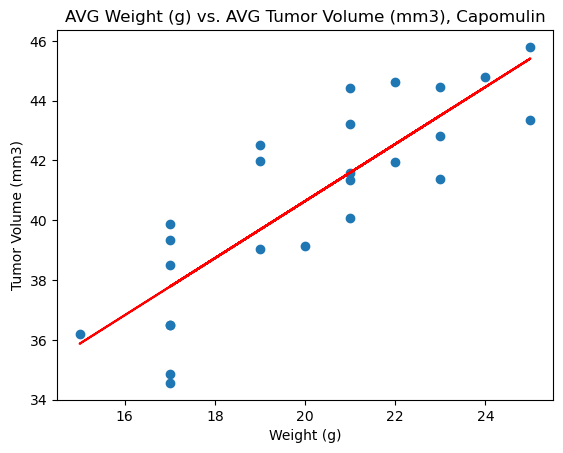

In [26]:
# Calculate the correlation coefficient and a linear regression model 
correlation = st.pearsonr(avg_weight_per_mouse,avg_tv_per_mouse)
print(f"The correlation between Average Mouse Weight (g) and Average Tumor Volume (mm3) is {round(correlation[0],2)}")

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_weight_per_mouse, avg_tv_per_mouse)
regress_values = avg_weight_per_mouse * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(avg_weight_per_mouse,avg_tv_per_mouse)
plt.plot(avg_weight_per_mouse,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title("AVG Weight (g) vs. AVG Tumor Volume (mm3), Capomulin")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')


#print(f"The r-squared is: {rvalue**2}")
plt.show()

